In [2]:
%load_ext autoreload
%autoreload 2

In [26]:
import os
import xarray as xr
import numpy as np

In [4]:
from matplotlib import pyplot as plt

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras.layers import UpSampling2D, Concatenate

Using TensorFlow backend.


In [28]:
from keras.utils import np_utils

In [44]:
# load the dataset
class_stack = {}

path = '/g/data/u46/users/ck9738/SENT_GEOMEDIAN/TEST/'
for count, filename in enumerate(sorted(os.listdir(path))):
    filepath = path+filename
    data = xr.open_rasterio(filepath, parse_coordinates=False)
    class_stack[count]=data.squeeze()
    if count == 0:
        pass
    elif count == 1:
        all_samples = xr.concat([class_stack[0],class_stack[1]], 'sample')
    else:
        all_samples = xr.concat([all_samples, class_stack[count]], 'sample')
    

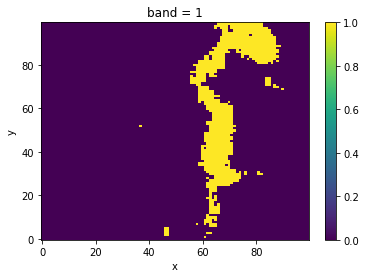

In [45]:
all_samples[0].plot()

In [46]:
all_samples.shape

(6, 100, 100)

In [47]:
cat_class_all = np_utils.to_categorical(all_samples, 2)
cat_class_all.shape

(6, 100, 100, 2)

In [74]:
# load the dataset
feature_stack = {}

path = '/g/data/u46/users/ck9738/SENT_GEOMEDIAN/TEST2/'
for count, filename in enumerate(sorted(os.listdir(path))):
    filepath = path+filename
    data = xr.open_rasterio(filepath, parse_coordinates=False)
    feature_stack[count]=data
    if count == 0:
        pass
    elif count == 1:
        all_features = xr.concat([feature_stack[0],feature_stack[1]], 'sample')
    else:
        all_features = xr.concat([all_features, feature_stack[count]], 'sample')


In [79]:
np_features = np.array(all_features)
np_features.shape

(6, 10, 100, 100)

In [80]:
np_features = np.transpose(np_features,(0,2,3,1))

In [81]:
np_features.shape

(6, 100, 100, 10)

In [92]:

    
#define a model
model = Sequential()

#add first convolutional 2D
#64 filters, kernal size 3, strides 3, input shape 100, 100, 10
model.add(Conv2D(64,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(224,224,10))) 

#add second conv2D
#64 filters, kernal size 3, strides 3
model.add(Conv2D(64,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add first MaxPooling2D filter
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="tf"))

#add Third conv2D
#128 filters, kernal size 3, strides 3
model.add(Conv2D(128,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add Fourth Conv2D
#128 filters, kernal size 3, strides 3
model.add(Conv2D(128,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add Second MaxPooling2D filter
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="tf"))

#add Fith Conv2D
#256 filters, kernal size 3, strides 3
model.add(Conv2D(256,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add Sith Conv2D
#256 filters, kernal size 3, strides 3
model.add(Conv2D(256,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add Third MaxPooling2D
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="tf"))

#add Seveth Conv2D
#512 filters, kernal size 3, strides 3
model.add(Conv2D(512,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add eight COnv2D
#512 filters, kernal size 3, strides 3
model.add(Conv2D(512,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add First Dropout Layer
model.add(Dropout(0.5))

#add Fourth Pooling 
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="tf"))

#add nith Conv2D
#1024 filters, kernal size 3, strides 3
model.add(Conv2D(1024,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add tenth Conv2D
#1024 filters, kernal size 3, strides 3
model.add(Conv2D(1024,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add Second Dropout Layer
model.add(Dropout(0.5))

#add First UpSample2D
model.add(UpSampling2D(size=(2,2)))

#add eleventh COnv2D
#512 filters, kernal size 3, strides 3
model.add(Conv2D(512,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#Add Merge Layer
#Merge on axis 3
model.add(Concatenate(axis=3))

#add twelth COnv2D
#512 filters, kernal size 3, strides 3
model.add(Conv2D(512,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add thirteenth Conv2D
#512 filters, kernal size 3, strides 3
model.add(Conv2D(512,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add second UpSample2D
model.add(UpSampling2D(size=(2,2)))

#add fourteenth Conv2D
#256 filters, kernal size 3, strides 3
model.add(Conv2D(256,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#Add Merge Layer
#Merge on axis 3
model.add(Concatenate(axis=3))

#add fithteenth Conv2D
#256 filters, kernal size 3, strides 3
model.add(Conv2D(256,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add fsixteenth Conv2D
#256 filters, kernal size 3, strides 3
model.add(Conv2D(256,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add third UpSample2D
model.add(UpSampling2D(size=(2,2)))

#add seventeeth conv2D
#128 filters, kernal size 3, strides 3
model.add(Conv2D(128,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#Add Merge Layer
#Merge on axis 3
model.add(Concatenate(axis=3))

#add eigteenth conv2D
#128 filters, kernal size 3, strides 3
model.add(Conv2D(128,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add nineteenth conv2D
#128 filters, kernal size 3, strides 3
model.add(Conv2D(128,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add fourth UpSample2D
model.add(UpSampling2D(size=(2,2)))

#add twentith conv2D
#64 filters, kernal size 3, strides 3
model.add(Conv2D(64,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#Add Merge Layer
#Merge on axis 3
model.add(Concatenate(axis=3))

#add twenty first conv2D
#64 filters, kernal size 3, strides 3
model.add(Conv2D(64,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add twenty second conv2D
#64 filters, kernal size 3, strides 3
model.add(Conv2D(64,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add twenty third conv2D
#2 filters 
model.add(Conv2D(2,3,strides=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))

#add final conv2D
#1 filter, activation Sigmod
model.add(Conv2D(1,1,strides=(3,3), activation='sigmoid', kernel_initializer='he_normal'))
# UNSURE if strides should be 3,3 or 1,1



/g/data/u46/users/ck9738/miniconda3/envs/kerasenv/lib/python3.6/site-packages/ipykernel/__main__.py:15: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_last")`
/g/data/u46/users/ck9738/miniconda3/envs/kerasenv/lib/python3.6/site-packages/ipykernel/__main__.py:26: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_last")`
/g/data/u46/users/ck9738/miniconda3/envs/kerasenv/lib/python3.6/site-packages/ipykernel/__main__.py:37: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_last")`


ValueError: Negative dimension size caused by subtracting 2 from 1 for 'max_pooling2d_17/MaxPool' (op: 'MaxPool') with input shapes: [?,1,1,256].

ValueError: Layer conv2d_1 was called with an input that isn't a symbolic tensor. Received type: <class 'tuple'>. Full input: [(100, 100, 10)]. All inputs to the layer should be tensors.

In [ ]:
actual_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [54]:
help(actual_model.fit())

NameError: name 'actual_model' is not defined